In [38]:
# importing the required modules
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from ReadFile import Read
# importing the CenterOfMass class.
from CenterOfMass import CenterOfMass

In [70]:
class MassProfile:
    
    def __init__(self, galaxy, Snap):
        
        ilbl = '000' + str(Snap)
        ilbl = ilbl[-3:]
        self.filename = "%s_" %(galaxy) + ilbl + '.txt'
        
        self.time, self.total, self.data = Read(self.filename)
        self.m = self.data['m']
        self.x = self.data['x'] * u.kpc
        self.y = self.data['y'] * u.kpc
        self.z = self.data['z'] * u.kpc
        
        self.gname = galaxy
        
        # function which returns the mass enclosed in a particular radius.
    def MassEnclosed(self, ptype, R):
        # INPUTS: ptpye = particle type.
        # R = It is an array with radii in kpc.
        # RETURNS: an array of enclosed mass within a radius (in kpc)
            
        # defining an object (COM) and calling COM_P from CenterOfMass class.
        COM = CenterOfMass(self.filename, 2) 
        # delta = took it to be 0.1 in previous HW.
        Gal_comp = COM.COM_P(0.1)
        # finding a particular particle type (ptype) from the data.
        index = np.where(self.data['type'] == ptype)
        #storing the positions of a given particle type from COM position.
        xG = self.x[index] - Gal_comp[0] * u.kpc
        yG = self.y[index] - Gal_comp[1] * u.kpc
        zG = self.z[index] - Gal_comp[2] * u.kpc
        # magnitude of that distance
        rG = np.sqrt(xG**2 + yG**2 + zG**2)
        # storing the mass of a particular particle type.
        mG = self.m[index]
            
        # initializing an array to be used in the loop. The array is of the size of R.
        Menc = np.zeros(np.size(R))
        
        # a for loop over the radii's elements to print out the masses within a particular radii.
        for i in range(np.size(R)):
            indexR = np.where(rG < R[i] *u.kpc)
            Menc[i] = np.sum(mG[indexR])*1e10
                
        return Menc *u.Msun 
        
    def MassEnclosedTotal(self, R):
        #INPUTS: an array of radii (in kpc) 
        # RETURNS: an array of total enclosed mass (in Msun)
        
        
        # calculating the total enclosed mass (of all particle types)
        Menc = self.MassEnclosed(1,R) + self.MassEnclosed(2,R) + self.MassEnclosed(3,R)
        # since M33 does not have a bulge, we need to exclude that part and hence the if statement.
        if (self.gname == 'M33'):
            Menc = self.MassEnclosed(1,R) + self.MassEnclosed(2,R)
        
        return Menc
        
     
    # calculating the mass enclosed within a theoretical radius (in kpc) using the Hernquist mass profile.
    def HernquistMass(self, R, a, Mhalo):
        # INPUTS: R = an array of radii (in kpc)
        # a = scale radius (in kpc)
        # Mhalo = mass (In Msun)
        
        return Mhalo*R**2/(a+R)**2 *u.Msun # the Hernquist mass profile.
    
    # module to calculate an array of circular velocities (in km/s) of a ptype within a given radius (in kpc).
    def CircularVelocity(self, ptype, R):
        #INPUTS: ptype = particle type.
        #radius = an array of radii (in kpc)
        G = 4.498768e-6 # the gravitational constant in astronomical units.
        Menc = self.MassEnclosed(ptype,R)
       
           
        circ_vel = np.around(np.sqrt(G*Menc/R/u.kpc),2)
                
        return circ_vel 
    
    # module to calculate an array of total circular velocities (in km/s) of all ptypes in a given radius.    
    def TotalCircularVelocity(self, R):
        # INPUTS: radius = an array of radii (in kpc).
        # RETURNS: an array of total circular velocity (in km/s) within a given radius.
        
        G = 4.498768e-6 # the gravitational constant in astro units
        Menc = self.MassEnclosedTotal(R)  
        TotalV_circ = np.around(np.sqrt(G*Menc/R/u.kpc),2)
                
        return TotalV_circ
     
    # module to calculate the circular speed using the Hernquist mass profile
    def HernquistVCirc(self, R, a, Mhalo):
        # INPUTS: R = an array of radii
        # a = scale radius (in kpc)
        # Mhalo = mass of halo (in Msun)
        G = 4.498768e-6  # the gravitational constant in astro units
        Menc = self.HernquistMass(R,a,Mhalo)   
        Hern_Vcirc = np.around(np.sqrt(G*Menc/R),2) #circular velocity using Hernquist mass profile.
        return Hern_Vcirc

In [71]:

MW = MassProfile("MW",0)
M31 = MassProfile("M31",0)
M33 = MassProfile("M33",0)

Text(0.15, 0.83, 'Milky Way Mass Profile')

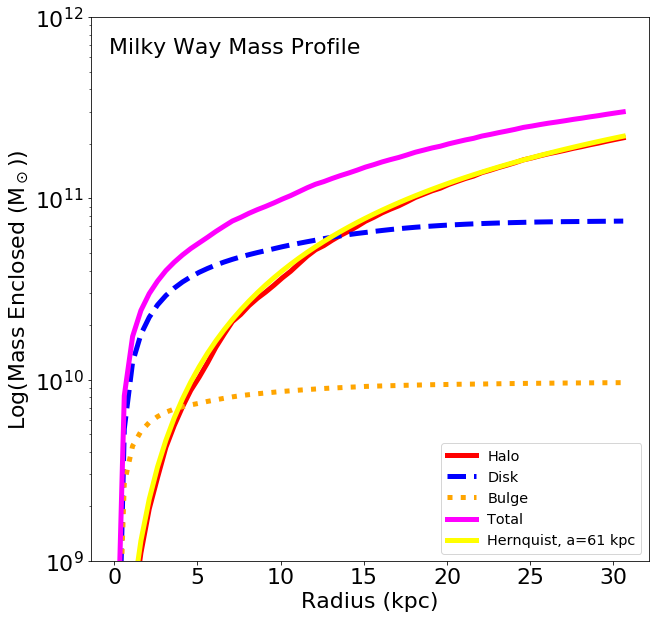

In [30]:
# the MW mass profile.


R = np.arange(0.1,31,0.5)
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
# mass profile of the Halo
plt.semilogy(R,MW.MassEnclosed(1,R), color='red', linewidth=5, label='Halo')

# of Disk
plt.semilogy(R,MW.MassEnclosed(2,R), color='blue', linewidth=5, linestyle = '--' ,label='Disk')

# of Bulge
plt.semilogy(R,MW.MassEnclosed(3,R), color='orange', linewidth=5, linestyle = ':', label='Bulge')

# Mass profile of the total enclosed mass.
plt.semilogy(R,MW.MassEnclosedTotal(R), color='magenta',linewidth=5, label='Total')

# mass profile using the Hernquist mass.
plt.semilogy(R,MW.HernquistMass(R,ScaleMW,Mtot_MW), color='yellow',linewidth=5, label='Hernquist, a=61 kpc')

# axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

# limits of the y-axis
plt.ylim(1e9,1e12)

# tick label sizes:
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# adding a legend
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Milky Way Mass Profile', fontsize=22)





Text(0.15, 0.83, 'Andromeda Mass Profile')

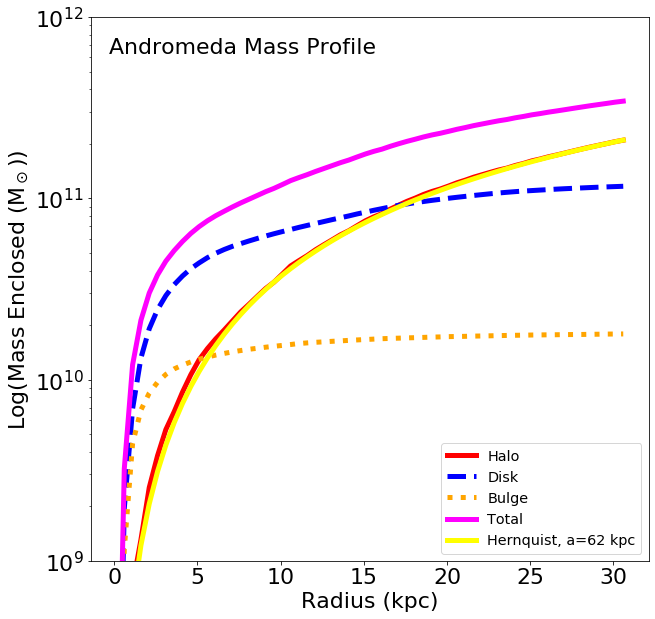

In [23]:
ScaleM31 = 62 # scale radius of M31
Mtot_M31 = 1.921e12 # total mass of M31

# plotting M31 mass profile:


R = np.arange(0.1,31,0.5)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# mass profile of the Halo
plt.semilogy(R,M31.MassEnclosed(1,R), color='red', linewidth=5, label='Halo')

# of disk
plt.semilogy(R,M31.MassEnclosed(2,R), color='blue', linewidth=5, linestyle = '--' ,label='Disk')

# of bulge
plt.semilogy(R,M31.MassEnclosed(3,R), color='orange', linewidth=5, linestyle = ':', label='Bulge')

# total mass enclosed profile
plt.semilogy(R,M31.MassEnclosedTotal(R), color='magenta',linewidth=5, label='Total')

# mass profile according to Hernquist.
plt.semilogy(R,M31.HernquistMass(R,ScaleM31,Mtot_M31), color='yellow',linewidth=5, label='Hernquist, a=62 kpc')

# axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

# y-axis limits
plt.ylim(1e9,1e12)

# label sizes
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# adding a legend
legend = ax.legend(loc='lower right',fontsize='x-large')

# adding figure text
plt.figtext(0.15, 0.83, 'Andromeda Mass Profile', fontsize=22)



Text(0.15, 0.83, 'M33 Mass Profile')

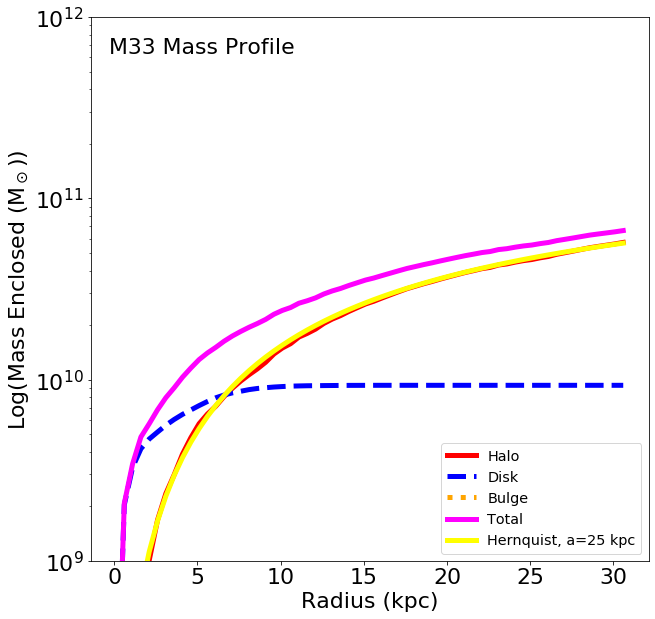

In [24]:
ScaleM33 = 25 # scale radius of M33
Mtot_M33 = 0.187e12 # total mass of M33

# Plotting M33 mass profile

R = np.arange(0.1,31,0.5) 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Mass profile of Halo
plt.semilogy(R,M33.MassEnclosed(1,R), color='red', linewidth=5, label='Halo')

# of disk
plt.semilogy(R,M33.MassEnclosed(2,R), color='blue', linewidth=5, linestyle = '--' ,label='Disk')

# of bulge
plt.semilogy(R,M33.MassEnclosed(3,R), color='orange', linewidth=5, linestyle = ':', label='Bulge')

# total mass profile of M33
plt.semilogy(R,M33.MassEnclosedTotal(R), color='magenta',linewidth=5, label='Total')

# mass profile according to Hernquist
plt.semilogy(R,M33.HernquistMass(R,ScaleM33,Mtot_M33), color='yellow',linewidth=5, label='Hernquist, a=25 kpc')

# labeling the axes
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

# setting the y-axis limits
plt.ylim(1e9,1e12)

# tick label sizes
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# adding a legend
legend = ax.legend(loc='lower right',fontsize='x-large')

# adding figure text
plt.figtext(0.15, 0.83, 'M33 Mass Profile', fontsize=22)



Text(0.15, 0.83, 'Milky Way Circular Velocity')

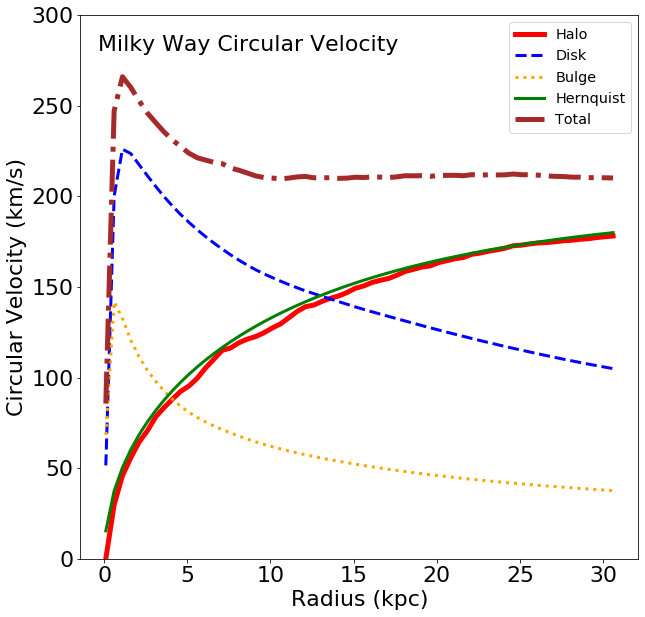

In [76]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

R = np.arange(0.1,31,0.5)
# circular velocity for Halo 
plt.plot(R,MW.CircularVelocity(1,R), color='red', linewidth=5, label='Halo')

# for Disk
plt.plot(R,MW.CircularVelocity(2,R), color='blue', linestyle="--", linewidth=3, label='Disk')

# for bulge
plt.plot(R,MW.CircularVelocity(3,R), color='orange', linestyle=":",linewidth=3, label='Bulge')

# velocity according to Hernquist profile
plt.plot(R,MW.HernquistVCirc(R,ScaleMW,Mtot_MW), color='green',linewidth=3, label='Hernquist')

# Total circular velocity
plt.plot(R,MW.TotalCircularVelocity(R), color='brown', linestyle="-.",linewidth=5, label='Total')



# axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Circular Velocity (km/s)', fontsize=22)

#set y-axis limits
plt.ylim(0,300)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend.
legend = ax.legend(loc='upper right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Milky Way Circular Velocity', fontsize=22)


Text(0.15, 0.83, 'Andromeda Circular Velocity')

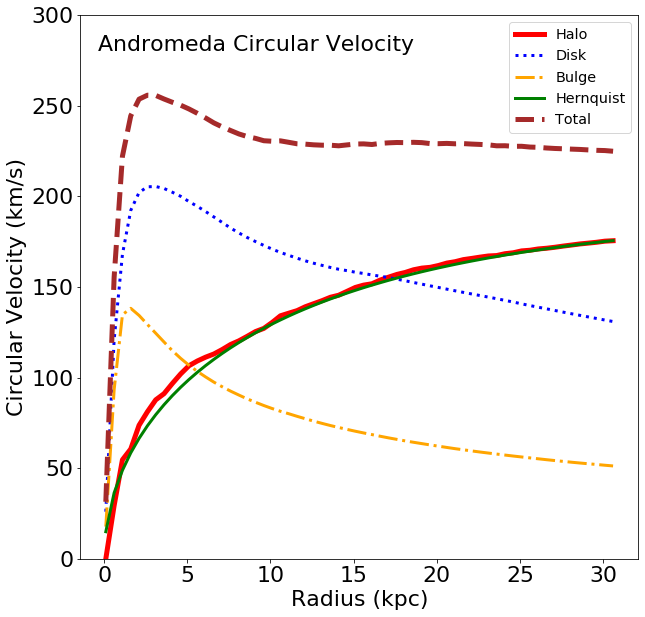

In [78]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Plot circular velocity for Halo 
plt.plot(R,M31.CircularVelocity(1,R), color='red', linewidth=5, label='Halo')

# for disk
plt.plot(R,M31.CircularVelocity(2,R), color='blue', linestyle=":", linewidth=3, label='Disk')

# for bulge
plt.plot(R,M31.CircularVelocity(3,R), color= 'orange', linestyle="-.",linewidth=3, label='Bulge')

# velocity according to Hernquist profile
plt.plot(R,M31.HernquistVCirc(R,ScaleM31,Mtot_M31), color='green',linewidth=3, label='Hernquist')

# Total Circular Velocity
plt.plot(R,M31.TotalCircularVelocity(R), color='brown', linestyle="--",linewidth=5, label='Total')



# axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Circular Velocity (km/s)', fontsize=22)

#set y-axis limits
plt.ylim(0,300)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend.
legend = ax.legend(loc='upper right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Andromeda Circular Velocity', fontsize=22)

Text(0.15, 0.83, 'M33 Circular Velocity')

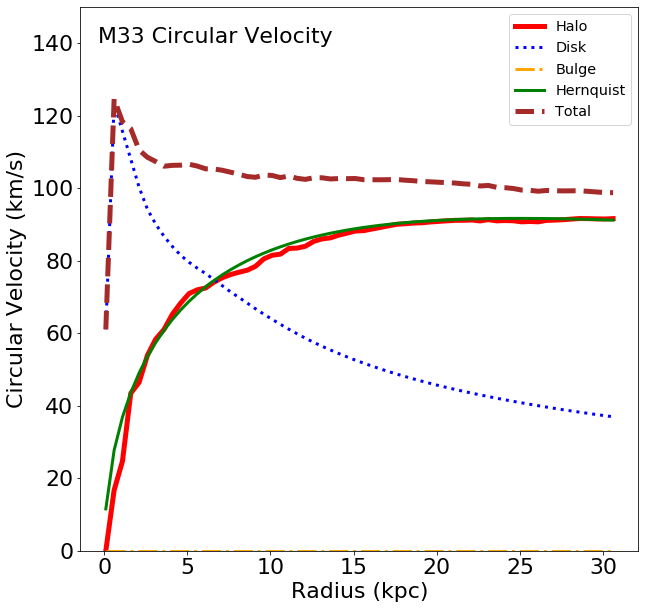

In [80]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Plot circular velocity for Halo 
plt.plot(R,M33.CircularVelocity(1,R), color='red', linewidth=5, label='Halo')

# for disk
plt.plot(R,M33.CircularVelocity(2,R), color='blue', linestyle=":", linewidth=3, label='Disk')

# for bulge
plt.plot(R,M33.CircularVelocity(3,R), color= 'orange', linestyle="-.",linewidth=3, label='Bulge')

# velocity according to Hernquist profile
plt.plot(R,M33.HernquistVCirc(R,ScaleM33,Mtot_M33), color='green',linewidth=3, label='Hernquist')

# Total Circular Velocity
plt.plot(R,M33.TotalCircularVelocity(R), color='brown', linestyle="--",linewidth=5, label='Total')



#axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Circular Velocity (km/s)', fontsize=22)

#set y-axis limits
plt.ylim(0,150)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'M33 Circular Velocity', fontsize=22)